# Analysis of the NYC Green Taxi Data for June 2016

Data dictionary source: https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.p


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## I. Statistical characteristics of the original dataset:

In [ ]:
import numpy as np       
import pandas as pd
import seaborn as sns     
,
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import warnings; warnings.simplefilter('ignore')


path = "/content/drive/MyDrive/Bachelorarbeit/green_tripdata_2016-06.csv"

#Dataset is now stored in Pandas Dataframe
df = pd.read_csv(path)

print('The dataset has',df.shape[0],'rows and',df.shape[1],'columns.')
print('Statistical data of the original Dataset:')
df.describe()

The dataset has 1404726 rows and 21 columns.
Statistical data of the original Dataset:


,VendorID,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
count,1.404726e+06,1.404726e+06,1.404726e+06,1.404726e+06,1.404726e+06,1.404726e+06,1.404726e+06,1.404726e+06,1.404726e+06,1.404726e+06,1.404726e+06,1.404726e+06,1.404726e+06,0.0,1.404726e+06,1.404726e+06,1.404726e+06,1.404724e+06
mean,1.795140e+00,1.091790e+00,-7.382591e+01,4.068546e+01,-7.385015e+01,4.069769e+01,1.358612e+00,2.879364e+00,1.250718e+01,3.502088e-01,4.868255e-01,1.307438e+00,1.190993e-01,NaN,2.921007e-01,1.508798e+01,1.515029e+00,1.021310e+00
std,4.035993e-01,5.990534e-01,2.863031e+00,1.578683e+00,2.509123e+00,1.383819e+00,1.026833e+00,2.990728e+00,1.069113e+01,3.857585e-01,8.534602e-02,2.909235e+00,9.104712e-01,NaN,5.122782e-02,1.223701e+01,5.241456e-01,1.444165e-01
min,1.000000e+00,1.000000e+00,-7.591609e+01,0.000000e+00,-7.591550e+01,0.000000e+00,0.000000e+00,0.000000e+00,-4.990000e+02,-4.500000e+00,-5.000000e-01,-1.320000e+01,-5.540000e+00,NaN,-3.000000e-01,-4.990000e+02,1.000000e+00,1.000000e+00
25%,2.000000e+00,1.000000e+00,-7.396138e+01,4.069402e+01,-7.396924e+01,4.069503e+01,1.000000e+00,1.070000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,NaN,3.000000e-01,8.190000e+00,1.000000e+00,1.000000e+00
50%,2.000000e+00,1.000000e+00,-7.394639e+01,4.074594e+01,-7.394553e+01,4.074610e+01,1.000000e+00,1.900000e+00,9.500000e+00,5.000000e-01,5.000000e-01,0.000000e+00,0.000000e+00,NaN,3.000000e-01,1.176000e+01,2.000000e+00,1.000000e+00
75%,2.000000e+00,1.000000e+00,-7.391862e+01,4.080157e+01,-7.391144e+01,4.078910e+01,1.000000e+00,3.600000e+00,1.500000e+01,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,NaN,3.000000e-01,1.830000e+01,2.000000e+00,1.000000e+00
max,2.000000e+00,9.900000e+01,0.000000e+00,4.232437e+01,0.000000e+00,4.232430e+01,9.000000e+00,2.681900e+02,3.347500e+03,4.500000e+00,5.000000e-01,3.000800e+02,9.800000e+01,NaN,3.000000e-01,3.349300e+03,5.000000e+00,2.000000e+00


# II: Datastructure
###The raw data originally consists of 1404726 rows and 21 columns.
The records can be categorized as following:

1. Administrative data: *VendorID, Store_and_fwd_flag, RateCodeID* 
2. Trip data: *lpep_pickup_datetime, lpep_dropoff_datetime, Pickup_longitude, Pickup_latitude, Dropoff_longitude, Dropoff_latitude, Passenger_count, Trip_distance, Trip_type* 
3. Payment data: *Fare_amount, Extra, MTA_tax, Tip_amount, Tolls_amount, Ehail_fee, Improvement_surcharge, Total_amount, Payment_type*



In [ ]:
print('Columns of the original Dataset:')
df.columns

Columns of the original Dataset:


Index(['vendorid', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'ratecodeid', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'pickup_datetime',
       'dropoff_datetime', 'pickup_time', 'dropoff_time', 'pickup_date',
       'dropoff_date', 'pickup_weekday', 'dropoff_weekday', 'pickup_day_no',
       'dropoff_day_no', 'pickup_month', 'dropoff_month', 'pickup_hour',
       'dropoff_hour', 'pickup_minute', 'dropoff_minute', 'trip_duration',
       'trip_duration_min', 'trip_duration_sec', 'id'],
      dtype='object')

# III. Dataset Exploration

For the coming steps, we will address:
1. Data types of the columns
2. Missing data by checking for null variables
3. Sum of unique values in each column

## 1. Data types
We noticed that the pickup and dropoff datetimes are of type object. We will need to convert that later in feature engineering section.

In [ ]:
print('Original dataframe information:')
df.info()

Original dataframe information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1404726 entries, 0 to 1404725
Data columns (total 21 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   VendorID               1404726 non-null  int64  
 1   lpep_pickup_datetime   1404726 non-null  object 
 2   Lpep_dropoff_datetime  1404726 non-null  object 
 3   Store_and_fwd_flag     1404726 non-null  object 
 4   RateCodeID             1404726 non-null  int64  
 5   Pickup_longitude       1404726 non-null  float64
 6   Pickup_latitude        1404726 non-null  float64
 7   Dropoff_longitude      1404726 non-null  float64
 8   Dropoff_latitude       1404726 non-null  float64
 9   Passenger_count        1404726 non-null  int64  
 10  Trip_distance          1404726 non-null  float64
 11  Fare_amount            1404726 non-null  float64
 12  Extra                  1404726 non-null  float64
 13  MTA_tax                1404726 non-null 

## 2. Missing Variables
- No Ehail fee was charged 
- Two values are missing in trip type

In [ ]:
#find rows with 0 variables
df.isnull().sum()

VendorID                       0
lpep_pickup_datetime           0
Lpep_dropoff_datetime          0
Store_and_fwd_flag             0
RateCodeID                     0
Pickup_longitude               0
Pickup_latitude                0
Dropoff_longitude              0
Dropoff_latitude               0
Passenger_count                0
Trip_distance                  0
Fare_amount                    0
Extra                          0
MTA_tax                        0
Tip_amount                     0
Tolls_amount                   0
Ehail_fee                1404726
improvement_surcharge          0
Total_amount                   0
Payment_type                   0
Trip_type                      2
dtype: int64

## 3. Sum of unique values
After comparing the sum of the obtained unique values with the data dictionary for green taxi rides  we found the following obvious outliers:
- Passenger count - cannot exceed 6 passengers
- Extra - can only have 4 different values
- Rate code IDs - are only 6
- MTA Tax - has only 2 possible values

These values and their relevance are explained in more details in the next sections. 

In [ ]:
#sum unique variables within the rows
df.nunique()

VendorID                       2
lpep_pickup_datetime     1033329
Lpep_dropoff_datetime    1030301
Store_and_fwd_flag             2
RateCodeID                     7
Pickup_longitude           31275
Pickup_latitude            69646
Dropoff_longitude          40430
Dropoff_latitude           80055
Passenger_count               10
Trip_distance               3184
Fare_amount                  984
Extra                         11
MTA_tax                        3
Tip_amount                  2059
Tolls_amount                 171
Ehail_fee                      0
improvement_surcharge          3
Total_amount                6223
Payment_type                   5
Trip_type                      2
dtype: int64

# IV. Feature Engineering


In this section we will do the following:
- Add few extra columns to help us further with the analysis
- Copy the dataset and change all the column names to lowercase to start preprocessing conveniently
- Remove obvious outliers

In [ ]:
# change all variable names to lower case letters
df.columns = [i.strip().lower() for i in list(df.columns)]
df.columns

Index(['vendorid', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'ratecodeid', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type'],
      dtype='object')


- Convert *lpep_pickup_datetime* and *lpep_dropoff_datetime* from objects to datetime objects which help us in extracting and creating the following new features to dropoffs and pickups: date, weekday, day of month, month, time, hour, minute and trip duration.
- Add a new index column 'id' 


In [ ]:
#convert it to datetime
df['pickup_datetime']=pd.to_datetime(df['lpep_pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
df['dropoff_datetime']=pd.to_datetime(df['lpep_dropoff_datetime'], format='%Y-%m-%d %H:%M:%S')

#extract the times
df['pickup_time']=pd.to_datetime(df['pickup_datetime'], format='%H:%M:%S')
df['dropoff_time']=pd.to_datetime(df['dropoff_datetime'], format='%H:%M:%S')

#extract the times
df['pickup_date']=pd.to_datetime(df['pickup_datetime'], format='%Y-%m-%d')
df['dropoff_date']=pd.to_datetime(df['dropoff_datetime'], format='%Y-%m-%d')

#extract and create new features from the datetime feature
# Delimit pickup_datetime variable 
df['pickup_date'] = df['pickup_datetime'].dt.date # Extract date
df['pickup_time'] = df['pickup_datetime'].dt.time # Extract time

# Delimit dropoff_datetime variables
df['dropoff_date'] = df['dropoff_datetime'].dt.date # Extract date
df['dropoff_time'] = df['dropoff_datetime'].dt.time # Extract time

df['pickup_weekday']=df['pickup_datetime'].dt.day_name()
df['dropoff_weekday']=df['dropoff_datetime'].dt.day_name()

df['pickup_day_no']=df['pickup_datetime'].dt.day
df['dropoff_day_no']=df['dropoff_datetime'].dt.day

df['pickup_month']=df['pickup_datetime'].dt.month
df['dropoff_month']=df['dropoff_datetime'].dt.month

df['pickup_hour']=df['pickup_datetime'].dt.hour
df['dropoff_hour']=df['dropoff_datetime'].dt.hour

df['pickup_minute']=df['pickup_datetime'].dt.minute
df['dropoff_minute']=df['dropoff_datetime'].dt.minute

#Calculate trip duration
df['trip_duration'] = df['dropoff_datetime'] - df['pickup_datetime']
df['trip_duration_min'] = df['trip_duration'].dt.total_seconds()/60
df['trip_duration_sec'] = df['trip_duration'].dt.total_seconds()


In [ ]:
df["id"] = df.index

In [ ]:
#copy the original dataset before modification
df_orig = df.copy()

In [ ]:
print('The modified dataset now has',df.shape[0],'rows and',df.shape[1],'columns.')

The modified dataset now has 1404726 rows and 41 columns.


#V. Data Analysis and Filtering


##1. Passenger Count
- In the original dataset there were trips with passenger count up to 10 passenger counts. According to the NYC Taxi and Limosine Commission the maximum number is 4 adults with 2 children under the age of 7. Therefore we will exclude trips with no passengers or with passenger count more than 6.


In [ ]:
# Remove passenger_count outliers
start_n = len(df)
df = df[df['passenger_count'] > 0]
df = df[df['passenger_count'] < 7]
print('This step excludes',start_n - len(df),'records, current sample size=',len(df))

This step excludes 444 records, current sample size= 1404282



##2. Latitude and Longitude
- The coordinate ranges of NYC are: 
  - Latitude is between 40.63 and 40.85
  - Longitude is between -74.03 and -73.75

In [ ]:
start_n = len(df)
# Remove coordinate outliers
df = df[df['pickup_longitude'] <= -73.75]
df = df[df['pickup_longitude'] >= -74.03]
df = df[df['pickup_latitude'] <= 40.85]
df = df[df['pickup_latitude'] >= 40.63]
df = df[df['dropoff_longitude'] <= -73.75]
df = df[df['dropoff_longitude'] >= -74.03]
df = df[df['dropoff_latitude'] <= 40.85]
df = df[df['dropoff_latitude'] >= 40.63]

print('This step excludes',start_n - len(df),'records, current sample size=',len(df))

This step excludes 94564 records, current sample size= 1309718


In [ ]:
trouble

NameError: ignored

## 3. Trip Duration
There are a lot of trip durations as low as 0 minutes and as high as 1440 minutes.
However, by calculating the 99th percentile we get a maximum value of 78.2 minutes. 
Trips of 0 minutes duration could be cancelled by the passenger therefore we will remove them. Furthermore, we will remove trips with durations more than 120 minutes. In the last step, we will remove trip_duration observations that are more than five standard deviations away from the mean duration time.

In [ ]:
df.trip_duration.describe()

count                      1309718
mean     0 days 00:23:13.026255270
std      0 days 01:54:25.671626041
min                0 days 00:00:00
25%                0 days 00:06:13
50%                0 days 00:10:25
75%                0 days 00:17:15
max                0 days 23:59:59
Name: trip_duration, dtype: object

In [ ]:
df.trip_duration_min.quantile(0.99)

78.21383333333458

In [ ]:
(df['trip_duration_min'] > 120).sum()

11449

In [ ]:
df = df[(df['trip_duration_min'] <= 120) & (df['trip_duration_min'] >= 1)]

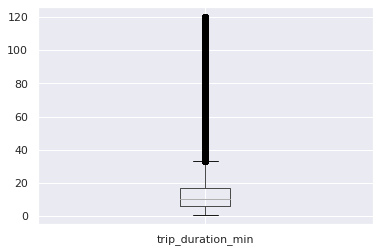

In [ ]:
df.boxplot(column=['trip_duration_min'])

In [ ]:
# Remove trip duration outliers
trip_duration_mean = np.mean(df['trip_duration'])
trip_duration_std = np.std(df['trip_duration'])
df = df[df['trip_duration']<=trip_duration_mean + 5*trip_duration_std]
df = df[df['trip_duration']>= trip_duration_mean - 5*trip_duration_std]

trip_duration_min_mean = np.mean(df['trip_duration_min'])

trip_duration_min_std = np.std(df['trip_duration_min'])
df = df[df['trip_duration_min']<=trip_duration_min_mean + 5*trip_duration_min_std]
df = df[df['trip_duration_min']>= trip_duration_min_mean - 5*trip_duration_min_std]

In [ ]:
df.trip_duration.describe()

count                      1274510
mean     0 days 00:13:07.109160383
std      0 days 00:09:35.191480597
min                0 days 00:01:00
25%                0 days 00:06:20
50%                0 days 00:10:25
75%                0 days 00:17:00
max                0 days 01:01:46
Name: trip_duration, dtype: object

In [ ]:
df.trip_duration_min.quantile(0.999)

59.191516666669244

In [ ]:
test = df.sort_values(by='trip_duration_min',ascending=False)
test.head(1000)

,vendorid,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,ratecodeid,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,pickup_datetime,dropoff_datetime,pickup_time,dropoff_time,pickup_date,dropoff_date,pickup_weekday,dropoff_weekday,pickup_day_no,dropoff_day_no,pickup_month,dropoff_month,pickup_hour,dropoff_hour,pickup_minute,dropoff_minute,trip_duration,trip_duration_min,trip_duration_sec,id
754128,1,2016-06-08 16:07:06,2016-06-08 17:08:52,N,1,-73.990486,40.678692,-73.994232,40.750950,1,7.30,37.5,1.0,0.5,7.86,0.0,NaN,0.3,47.16,1,1.0,2016-06-08 16:07:06,2016-06-08 17:08:52,16:07:06,17:08:52,2016-06-08,2016-06-08,Wednesday,Wednesday,8,8,6,6,16,17,7,8,0 days 01:01:46,61.766667,3706.0,754128
110211,2,2016-06-03 14:22:39,2016-06-03 15:24:25,N,1,-73.969162,40.676643,-73.870956,40.774094,1,12.14,45.0,0.0,0.5,5.00,0.0,NaN,0.3,50.80,1,1.0,2016-06-03 14:22:39,2016-06-03 15:24:25,14:22:39,15:24:25,2016-06-03,2016-06-03,Friday,Friday,3,3,6,6,14,15,22,24,0 days 01:01:46,61.766667,3706.0,110211
69769,2,2016-06-02 15:46:30,2016-06-02 16:48:16,N,1,-73.956291,40.747105,-73.782745,40.644119,1,15.07,48.5,0.0,0.5,0.00,0.0,NaN,0.3,49.30,2,1.0,2016-06-02 15:46:30,2016-06-02 16:48:16,15:46:30,16:48:16,2016-06-02,2016-06-02,Thursday,Thursday,2,2,6,6,15,16,46,48,0 days 01:01:46,61.766667,3706.0,69769
1370068,2,2016-06-22 16:59:18,2016-06-22 18:01:04,N,1,-73.958694,40.703991,-73.991692,40.635704,1,6.42,35.0,1.0,0.5,0.00,0.0,NaN,0.3,36.80,2,1.0,2016-06-22 16:59:18,2016-06-22 18:01:04,16:59:18,18:01:04,2016-06-22,2016-06-22,Wednesday,Wednesday,22,22,6,6,16,18,59,1,0 days 01:01:46,61.766667,3706.0,1370068
451399,1,2016-06-06 09:37:03,2016-06-06 10:38:48,N,1,-73.961113,40.660957,-73.973442,40.793640,3,11.20,46.5,0.0,0.5,0.00,0.0,NaN,0.3,47.30,2,1.0,2016-06-06 09:37:03,2016-06-06 10:38:48,09:37:03,10:38:48,2016-06-06,2016-06-06,Monday,Monday,6,6,6,6,9,10,37,38,0 days 01:01:45,61.750000,3705.0,451399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213573,2,2016-06-04 19:53:03,2016-06-04 20:52:46,N,1,-73.986435,40.687614,-73.824966,40.761780,6,13.88,42.0,0.0,0.5,0.00,0.0,NaN,0.3,42.80,2,1.0,2016-06-04 19:53:03,2016-06-04 20:52:46,19:53:03,20:52:46,2016-06-04,2016-06-04,Saturday,Saturday,4,4,6,6,19,20,53,52,0 days 00:59:43,59.716667,3583.0,213573
827902,1,2016-06-09 07:24:07,2016-06-09 08:23:50,N,1,-73.919647,40.633984,-73.959251,40.743057,1,10.50,40.5,0.0,0.5,0.00,0.0,NaN,0.3,41.30,1,1.0,2016-06-09 07:24:07,2016-06-09 08:23:50,07:24:07,08:23:50,2016-06-09,2016-06-09,Thursday,Thursday,9,9,6,6,7,8,24,23,0 days 00:59:43,59.716667,3583.0,827902
609086,1,2016-06-16 18:08:07,2016-06-16 19:07:49,N,1,-73.972977,40.670486,-73.778809,40.645035,1,12.60,50.5,1.0,0.5,10.00,0.0,NaN,0.3,62.30,1,1.0,2016-06-16 18:08:07,2016-06-16 19:07:49,18:08:07,19:07:49,2016-06-16,2016-06-16,Thursday,Thursday,16,16,6,6,18,19,8,7,0 days 00:59:42,59.700000,3582.0,609086
878243,2,2016-06-27 15:38:18,2016-06-27 16:38:00,N,1,-73.901749,40.819649,-74.008446,40.734062,1,10.91,45.0,0.0,0.5,0.00,0.0,NaN,0.3,45.80,1,1.0,2016-06-27 15:38:18,2016-06-27 16:38:00,15:38:18,16:38:00,2016-06-27,2016-06-27,Monday,Monday,27,27,6,6,15,16,38,38,0 days 00:59:42,59.700000,3582.0,878243


In [ ]:
test = df.sort_values(by='trip_duration_min',ascending=True)
test.head(1000)

,vendorid,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,ratecodeid,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,pickup_datetime,dropoff_datetime,pickup_time,dropoff_time,pickup_date,dropoff_date,pickup_weekday,dropoff_weekday,pickup_day_no,dropoff_day_no,pickup_month,dropoff_month,pickup_hour,dropoff_hour,pickup_minute,dropoff_minute,trip_duration,trip_duration_min,trip_duration_sec,id
1165802,1,2016-06-11 11:41:28,2016-06-11 11:42:28,N,1,-73.920670,40.678787,-73.913895,40.678444,1,0.40,3.0,0.0,0.5,0.75,0.0,NaN,0.3,4.55,1,1.0,2016-06-11 11:41:28,2016-06-11 11:42:28,11:41:28,11:42:28,2016-06-11,2016-06-11,Saturday,Saturday,11,11,6,6,11,11,41,42,0 days 00:01:00,1.000000,60.0,1165802
411214,2,2016-06-15 07:58:25,2016-06-15 07:59:25,N,2,-73.911713,40.813896,-73.912735,40.814201,1,0.00,-52.0,0.0,-0.5,0.00,0.0,NaN,-0.3,-52.80,4,1.0,2016-06-15 07:58:25,2016-06-15 07:59:25,07:58:25,07:59:25,2016-06-15,2016-06-15,Wednesday,Wednesday,15,15,6,6,7,7,58,59,0 days 00:01:00,1.000000,60.0,411214
847886,2,2016-06-27 09:29:06,2016-06-27 09:30:06,N,1,-73.880157,40.748150,-73.884666,40.747639,1,0.22,3.0,0.0,0.5,0.00,0.0,NaN,0.3,3.80,2,1.0,2016-06-27 09:29:06,2016-06-27 09:30:06,09:29:06,09:30:06,2016-06-27,2016-06-27,Monday,Monday,27,27,6,6,9,9,29,30,0 days 00:01:00,1.000000,60.0,847886
880234,1,2016-06-09 16:14:23,2016-06-09 16:15:23,N,1,-73.954857,40.789165,-73.955231,40.789001,1,0.50,2.5,1.0,0.5,0.00,0.0,NaN,0.3,4.30,2,1.0,2016-06-09 16:14:23,2016-06-09 16:15:23,16:14:23,16:15:23,2016-06-09,2016-06-09,Thursday,Thursday,9,9,6,6,16,16,14,15,0 days 00:01:00,1.000000,60.0,880234
411222,2,2016-06-15 07:32:50,2016-06-15 07:33:50,N,1,-73.937920,40.823441,-73.941895,40.818039,1,0.44,3.5,0.0,0.5,0.00,0.0,NaN,0.3,4.30,1,1.0,2016-06-15 07:32:50,2016-06-15 07:33:50,07:32:50,07:33:50,2016-06-15,2016-06-15,Wednesday,Wednesday,15,15,6,6,7,7,32,33,0 days 00:01:00,1.000000,60.0,411222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1209489,2,2016-06-20 19:48:46,2016-06-20 19:49:51,N,5,-73.986595,40.668930,-73.986626,40.668941,1,0.00,11.3,0.0,0.0,2.26,0.0,NaN,0.0,13.56,1,2.0,2016-06-20 19:48:46,2016-06-20 19:49:51,19:48:46,19:49:51,2016-06-20,2016-06-20,Monday,Monday,20,20,6,6,19,19,48,49,0 days 00:01:05,1.083333,65.0,1209489
861723,2,2016-06-09 14:55:09,2016-06-09 14:56:14,N,1,-73.938354,40.800331,-73.936066,40.799625,1,0.14,3.0,0.0,0.5,1.14,0.0,NaN,0.3,4.94,1,1.0,2016-06-09 14:55:09,2016-06-09 14:56:14,14:55:09,14:56:14,2016-06-09,2016-06-09,Thursday,Thursday,9,9,6,6,14,14,55,56,0 days 00:01:05,1.083333,65.0,861723
860855,1,2016-06-27 11:07:43,2016-06-27 11:08:48,N,1,-73.945389,40.751312,-73.945396,40.751328,1,1.10,3.0,0.0,0.5,0.00,0.0,NaN,0.3,3.80,2,1.0,2016-06-27 11:07:43,2016-06-27 11:08:48,11:07:43,11:08:48,2016-06-27,2016-06-27,Monday,Monday,27,27,6,6,11,11,7,8,0 days 00:01:05,1.083333,65.0,860855
811826,2,2016-06-18 01:56:13,2016-06-18 01:57:18,N,1,-73.949898,40.806591,-73.946907,40.810711,1,0.30,3.0,0.5,0.5,0.00,0.0,NaN,0.3,4.30,2,1.0,2016-06-18 01:56:13,2016-06-18 01:57:18,01:56:13,01:57:18,2016-06-18,2016-06-18,Saturday,Saturday,18,18,6,6,1,1,56,57,0 days 00:01:05,1.083333,65.0,811826


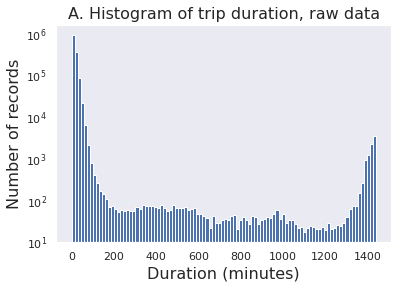

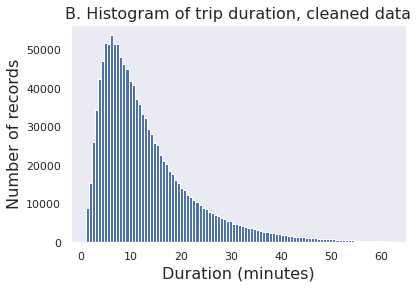

The average trip duration is 13.1 , the standard deviation is 9.6
The median trip duration is 10.4 , the 95% of trip durations fell between 2.42 to 39.4


In [ ]:
old = plt.hist(df_orig['trip_duration_min'], bins=100);
plt.title('A. Histogram of trip duration, raw data', fontsize = 16)
plt.xlabel('Duration (minutes)', fontsize = 16)
plt.ylabel('Number of records', fontsize = 16)
plt.yscale('log')
plt.savefig("histotripDurrawnyc.png", transparent=True)
plt.grid(False)
plt.box(True)
plt.show(old)

new = plt.hist(df['trip_duration_min'], bins=100);
plt.title('B. Histogram of trip duration, cleaned data', fontsize = 16)
plt.xlabel('Duration (minutes)', fontsize = 16)
plt.ylabel('Number of records', fontsize = 16);
plt.savefig("histotripDurnewnyc.png", transparent=True)
plt.grid(False)
plt.box(True)
plt.show(new)
'''
old = sns.hist(y=df_orig.trip_distance, x='trip_duration_min',data=df_orig)
pl.xlabel("Duration (minutes)")
pl.ylabel("Trip Distance")
pl.title("B. Histogram of trip duration, raw data")
pl.show(old)

new = sns.relplot(y=df.trip_distance,x='trip_duration_min',data=df)
pl.xlabel("Duration (minutes)")
pl.ylabel("Trip Distance")
pl.title("B. Histogram of trip duration, cleaned data")
pl.show(new)
'''
print('The average trip duration is',round(df['trip_duration_min'].mean(),1),', the standard deviation is',round(df['trip_duration_min'].std(),1))
print('The median trip duration is',round(df['trip_duration_min'].median(),1),', the 95% of trip durations fell between',
      round(df['trip_duration_min'].quantile(.025),2),'to',round(df['trip_duration_min'].quantile(.975), 1))


In [ ]:
print('The modified dataset has',df.shape[0],'rows and',df.shape[1],'columns.')

## 4. Trip Distance
We removed trips with distances less than 1 mile and more than 30 miles after getting the 99.9th quantile. 

In [ ]:
df.trip_distance.describe()

In [ ]:
df.hist(column='trip_distance')
plt.title("Histogram of Trip Distance Distribution")
plt.xlabel("Trip Distance")
plt.ylabel("No. of Trips")

In [ ]:
df.trip_distance.quantile(0.999)

In [ ]:
test = df.sort_values(by='trip_distance',ascending=True)
test.head(30)

In [ ]:
(df['trip_distance']>=30).sum()

In [ ]:
df = df[(df['trip_distance'] <= 30) & (df['trip_distance'] >= 1)]

In [ ]:
test = df.sort_values(by='trip_distance',ascending=False)
test.head(50)

In [ ]:
print('The modified dataset has',df.shape[0],'rows and',df.shape[1],'columns.')

In [ ]:
old = plt.hist(df_orig['trip_distance'], bins=100);
plt.title('A. Histogram of trip distance, raw data', fontsize = 16)
plt.xlabel('Distance (mile)', fontsize = 16)
plt.ylabel('Number of Trips', fontsize = 16)
plt.yscale('log')
plt.savefig("histotripDistrawnyc.png", transparent=True)
plt.show(old)

new = plt.hist(df['trip_distance'], bins=100);
plt.title('B. Histogram of trip distance, cleaned data', fontsize = 16)
plt.xlabel('Distance (mile)', fontsize = 16)
plt.ylabel('Number of Trips', fontsize = 16);
plt.yscale('log')
plt.savefig("histotripDistrawnyc.png", transparent=True)

plt.show(new)
'''
# plot distance with and without data cleaning
fig, axs = plt.subplots(1,2)
fig.set_size_inches(15, 7)
fig.subplots_adjust(wspace=.5)

axs[0].hist(df_orig['trip_distance'],bins=100);
axs[0].set_title('A. Histogram of distance, raw data')
axs[0].set_xlabel('Distance (mile)')
axs[0].set_ylabel('Number of Trips')
axs[0].set_yscale('log')

axs[1].hist(df['trip_distance'],bins=100);
axs[1].set_title('B. Histogram of distance, cleaned data')
axs[1].set_xlabel('Distance (mile)')
axs[1].set_ylabel('Number of Trips');
axs[0].set_yscale('log')

#fig.savefig('fig2.svg', format='svg',dpi=400, bbox_inches='tight')
'''
print('The average distance is',round(df['trip_distance'].mean(),1),', the standard deviation is',round(df['trip_distance'].std(),1))
print('The median distance is',round(df['trip_distance'].median(),1),', the 95% of trips distance fell between',
      round(df['trip_distance'].quantile(.025),2),'to',round(df['trip_distance'].quantile(.975), 1))

## 5. Average Trip Speed
We added a new column *trip_speed* which corresponds  to the average speed of the trip. This will help with identifying trip outliers with extremely low or extremely high speeds.
According to https://www.newyorkcarlaws.com/speed-limit/ the maximum speed limit within NYC is 65 mph so we will start by eliminating rows with average trip speeds lower than 5 mph and higher than 55 mph. In the last step, we will remove trip_speed observations that are more than five standard deviations away from the mean average speed.

In [ ]:
# calculate average speed for a trip in mph
df['trip_speed'] = df['trip_distance'] / (df['trip_duration_min']/60)
df_orig['trip_speed'] = df_orig['trip_distance'] / (df_orig['trip_duration_min']/60)


In [ ]:
df.trip_speed.describe()

In [ ]:
plt.boxplot(df['trip_speed'])
plt.xlabel('Average Trip Speed (mph)' , fontsize=16)
plt.ylabel('Number of Trips', fontsize=16)
plt.yticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('A. Boxplot of Average trip speed, before filtering', fontsize=16)
plt.savefig("boxtripspeedrawnyc.png", transparent=True)
plt.grid(True)
plt.box(True)
plt.show()

In [ ]:
start_n = len(df)
df = df[(df['trip_speed']<= 55) & (df['trip_speed'] > 5)]
print('This step excludes',start_n - len(df),'records, current sample size=',len(df))

In [ ]:
plt.boxplot(df['trip_speed'])
plt.xlabel('Average Trip Speed (mph)' , fontsize=16)
plt.ylabel('Number of Trips', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('A. Boxplot of Average trip speed, before filtering', fontsize=16)
plt.savefig("boxtripspeednewnyc.png", transparent=True)
plt.grid(True)
plt.box(True)
plt.show()


In [ ]:
df.boxplot(column=['trip_speed'])

In [ ]:
start_n = len(df)
trip_speed_mean = np.mean(df['trip_speed'])
trip_speed_std = np.std(df['trip_speed'])
df = df[df['trip_speed']<=trip_speed_mean + 5*trip_speed_std]
df = df[df['trip_speed']>= trip_speed_mean - 5*trip_speed_std]
print('This step excludes',start_n - len(df),'records, current sample size=',len(df))

In [ ]:
df.hist(column='trip_speed')
plt.title("Histogram of Average Trip Speed Distribution")
plt.xlabel("Average Trip Speed")
plt.ylabel("No. of Trips")

In [ ]:
df['trip_speed'].describe()

In [ ]:
#sns.relplot(y=df.trip_distance,x='trip_duration_min',data=df, kind="scatter" )

In [ ]:
import pylab as pl

old = sns.relplot(y=df_orig.trip_distance, x='trip_duration_min',data=df_orig, kind="scatter")
pl.xlabel("Duration (minutes)")
pl.ylabel("Trip Distance")
pl.title("B. Histogram of trip duration, raw data")
pl.show(old)

new = sns.relplot(y=df.trip_distance,x='trip_duration_min',data=df, kind="scatter" )
pl.xlabel("Duration (minutes)")
pl.ylabel("Trip Distance")
pl.title("B. Histogram of trip duration, cleaned data")
pl.show(new)

print('The average trip speed is',round(df['trip_duration_min'].mean(),1),', the standard deviation is',round(df['trip_duration_min'].std(),1))
print('The median trip speed is',round(df['trip_duration_min'].median(),1),', the 95% of trips speed fell between', round(df['trip_duration_min'].quantile(.025),2),'to',round(df['trip_duration_min'].quantile(.975), 1))

In [ ]:
plt.boxplot(df['trip_speed'])
plt.xlabel('Average Trip Speed (mph)' , fontsize=16)
plt.ylabel('Number of Trips', fontsize=16)
plt.yticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('B. Boxplot of Average trip speed, after filtering', fontsize=16)
plt.grid(True)
plt.box(True)

## 6. Taxi Fare
There are many features in our dataset that calculate the separate ride fares such as:

*   fare_amount
*   extra
*   mta_tax
*   tip_amount
*   tolls_amount
*   ehail_fee
*   improvement_surcharge
*   total_amount






 
 


 

### 6.1 Fare Amount
According to https://www1.nyc.gov/site/tlc/passengers/taxi-fare.page the initial charge is $2.50 with the following extra charges:
50 cents per 1/5 mile when travelling above 12mph or per 60 s in slow traffic or when the vehicle stops.
Congestion Surcharge 2.75 for all trips that begin, end or pass through Manhattan south of 96th Street.
Since we decided that max trip distance is 30 miles and maximum duration is 120 minutes, therefore the maximum possible value is 2.5+((30x0.5)/0.2)+2.75= 80.25 

###6.2 Tip Amount
we will remove tips that are equal to or greater than the 50% of the trip's fare.
 





In [ ]:
df.fare_amount.describe()

In [ ]:
start_n = len(df)
# To remove trips with extreme fare amounts:
# 1.  minimum amount $2.5 & maximum amount < $80.25
filter1 = (df['fare_amount']>=2.5) & (df['fare_amount'] <= 80.25)
# 2. remove trips with tip amount > 50% of the fare amount (implausible values)
filter2 = df['tip_amount'] <= 0.5*df['fare_amount']
df = df [filter1 & filter2]
print('This step excludes',start_n - len(df),'records, current sample size=',len(df))

### 6.3 Extra
50 cents overnight surcharge 8pm to 6am.

\$1.00 rush hour surcharge from 4pm to 8pm on weekdays, excluding holidays.

\$4.5 rush hour surcharge from 4pm to 8pm on weekdays, excluding holidays for airport rides. 



In [ ]:
df.groupby(['extra']).sum()

### 6.4 MTA Tax
All trips that end in New York City or Nassau, Suffolk, Westchester, Rockland, Dutchess, Orange or Putnam Counties charge 50 cents as MTA State Surchange.
We removed the trips that did not charge this value.

In [ ]:
df.groupby(['mta_tax']).sum()

In [ ]:
print (df.loc[df.mta_tax != 0.5, 'mta_tax'].count())

In [ ]:
start_n = len(df)
df = df[(df['mta_tax'] == 0.5)]
print('This step excludes',start_n - len(df),'records, current sample size=',len(df))



---
##**Summary of Data Filtering Results:**

---




In [ ]:
df.describe().transpose()

# VI. Explanatory Analysis

### Trips per time of day


In [ ]:
import seaborn as sns
plt.figure(figsize=(8,5))

bar_df = df.groupby('pickup_hour').aggregate({'id':'count'}).reset_index()
sns.barplot(x='pickup_hour', y='id', data=bar_df, color="royalblue")

plt.title('Pick-ups Hour Distribution', fontsize=16)
plt.xlabel('Hour of Day', fontsize=16)
plt.ylabel('Total Trips made', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("pickupshourDistny.png", transparent=True)
plt.show()

In [ ]:
figure,(ax9,ax10)=plt.subplots(ncols=2,figsize=(20,5))
ax9.set_title('Pickup Hours', fontsize=16)
ax=sns.countplot(x="pickup_hour",data=df,ax=ax9)
plt.tick_params(axis='both', which='major', labelsize=16)
ax10.set_title('Dropoff Hours', fontsize=16)
ax=sns.countplot(x="dropoff_hour",data=df,ax=ax10)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


### Trips per Weekday

In [ ]:
pickups_by_day = df.groupby('pickup_weekday').count()['id']

pickups_graph = pickups_by_day.plot(x = 'pickup_weekday',  figsize = (26,8))

pickups_graph.tick_params(axis = 'both', which = 'major', labelsize = 12)

pickups_graph.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

pickups_graph.set_title(' Number of Trips per Weekdays')
pickups_graph.xaxis.label.set_visible(True)
pickups_graph.set_ylabel('Number of Trips')
pickups_graph.yaxis.label.set_visible(True)
plt.show()

In [ ]:
plt.figure(figsize=(8,5))

bar_df = df.groupby('pickup_weekday').aggregate({'id':'count'}).reset_index()
sns.barplot(x='pickup_weekday', y='id', data=bar_df, color = "royalblue")

plt.title('Pick-ups per Weekday Distribution', fontsize=16)
plt.xlabel('Weekday', fontsize=16)
plt.ylabel('Total Trips made', fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=14)
plt.savefig("weekdaydistPortoDistny.png", transparent=True)
plt.show()

In [ ]:
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))
ax1.set_title('Pickup Days')
ax=sns.countplot(x="pickup_weekday",data=df,ax=ax1)
ax2.set_title('Dropoff Days')
ax=sns.countplot(x="dropoff_weekday",data=df,ax=ax2)
plt.tick_params(axis='both', which='major', labelsize=14)


In [ ]:
trip_duration_median = df['trip_duration_sec'].median()
plt.figure(figsize=(8.5,5))
pickup_hourday = df.groupby(['pickup_hour','pickup_weekday'])['trip_duration_sec'].median().unstack()
hourday_graph = sns.heatmap(pickup_hourday[pickup_hourday>trip_duration_median],
                                   lw = .5, annot = True, cmap = 'GnBu', fmt = 'g',annot_kws = {"size":10} )
hourday_graph.tick_params(axis = 'both', which = 'major', labelsize = 10)

hourday_graph.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .70)

hourday_graph.xaxis.label.set_visible(True)
hourday_graph.yaxis.label.set_visible(True)

plt.ylabel('Pickup hour')
plt.xlabel('Pickup Weekday')
plt.title('Median Trip Duration by Pickup Hour and Day of Week')
plt.show()


###Trips per month days

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,2))

bar_df = df.groupby('pickup_day_no').aggregate({'id':'count'}).reset_index()
sns.barplot(x='pickup_day_no', y='id', data=bar_df)

plt.title('Pick-up Days Distribution')
plt.xlabel('Day number')
plt.ylabel('No of Trips made')
plt.show()

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,2))

bar_df = df.groupby('dropoff_day_no').aggregate({'id':'count'}).reset_index()
sns.barplot(x='dropoff_day_no', y='id', data=bar_df)

plt.title('Drop off Days Distribution')
plt.xlabel('Day number')
plt.ylabel('No of Trips made')
plt.show()


### Trips by vendor ID

In [ ]:
plt.figure(figsize=(12,6))
vendor_graph = sns.boxplot(x = 'vendorid', y = 'trip_duration_min', data = df, palette = 'gist_rainbow', linewidth = 2.3)

vendor_graph.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .70)

vendor_graph.set_title('Trip duration distribution by vendor ID')
plt.show()

df.groupby('vendorid')['trip_duration_min'].describe()

### Trip duration per passenger count

In [ ]:
import matplotlib
matplotlib.style.use('fivethirtyeight')

plt.figure(figsize=(12,6))
passenger_graph = sns.boxplot(x = 'passenger_count', y = 'trip_duration_min', data = df, 
                          palette = 'gist_rainbow', linewidth = 2.3)

passenger_graph.tick_params(axis = 'both', which = 'major', labelsize = 12)

passenger_graph.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .70)
passenger_graph.set_title('Trip duration (min) distribution by Passenger count')
plt.show()

# Statistical summary
df.groupby('passenger_count')['trip_duration_min'].describe().transpose()

### Pickup hours per trip duration and distance

In [ ]:
gf = sns.lineplot(x='pickup_hour', y='trip_duration_min', data=df)
gf.set_xlabel('Pickup Hour', fontsize=16)
gf.set_ylabel('Average Trip Duration (min)', fontsize=16)
gf.set_title('Average trip duration per pickup hour', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=12)


### Pickup day per trip duration

In [ ]:
sns.lineplot(x='pickup_weekday', y='trip_duration_min', data=df)
plt.xlabel('Pickup Weekday', fontsize=16)
plt.ylabel('Average Trip Duration (min)', fontsize=16)
plt.title('Average trip duration per pickup weekday', fontsize=16)
plt.yticks(fontsize=12)
plt.xticks(fontsize=10)


### Pickup hour per trip distance

In [ ]:
gf = sns.lineplot(x='pickup_hour', y='trip_distance', data=df)
gf.set_xlabel('Pickup Hour', fontsize=16)
gf.set_ylabel('Trip Distance (km)', fontsize=16)

### Pickup day per trip distance

In [ ]:
plt.figure(figsize=(12,5))
sns.lineplot(x='pickup_weekday', y='trip_duration_min', data=df)
plt.xlabel('Pickup Weekday', fontsize=20)
plt.ylabel('Average Trip Duration (min)', fontsize=20)
plt.title('Average trip duration per pickup weekday', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)

In [ ]:
plt.figure(figsize=(15,8))
gf = sns.lineplot(x='pickup_hour', y='trip_duration_min', data=df)
gf.set_xlabel('Pickup Hour', fontsize=20)
gf.set_ylabel('Average Trip Duration (min)', fontsize=20)
gf.set_title('Average trip duration per pickup hour', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)

In [ ]:
gf = sns.lineplot(x='pickup_weekday', y='trip_distance', data=df)
gf.set_xlabel('Pickup Weekday')
gf.set_ylabel('Average Trip Distance (km)')

### Trip distance per trip duration

In [ ]:
sns.displot(data=df, x='trip_distance', y='trip_duration_min')
plt.xlabel('Trip Duration (min)')
gf.set_ylabel('Trip Distance (mile)')
gf.set_title('Average trip duration per Trip distance', fontsize=16)
gf.tick_params(axis='both', which='major', labelsize=14)

### Trip Distance per Trip Duration

In [ ]:
#Relation between trip distance and trip time
import plotly.graph_objs as go
data = [go.Histogram2dContour(x=df.trip_distance, y=df.trip_duration_min)]
layout = go.Layout(
    xaxis=dict(range=[0, 6], title="Trip distance [km]"),
    yaxis=dict(range=[0, 12], title="Trip time [min]"),
)
fig = go.Figure(data=data, layout=layout)

fig.show()

#Pickups and Dropoffs map

In [ ]:
longitude = list(df.pickup_longitude) + list(df.dropoff_longitude)
latitude = list(df.pickup_latitude) + list(df.dropoff_latitude)
plt.figure(figsize = (10,8))
plt.plot(longitude,latitude,'.',alpha = .40, markersize = .8)
plt.title('Trip Plots')
plt.show()

In [ ]:
df.to_csv('/content/drive/MyDrive/Bachelorarbeit/PreProcessed_NYC_GreenTaxi_1.csv')